In [52]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import graphviz 

In [58]:
df = pd.read_csv("celulas.csv", sep=";")

onehot = preprocessing.OneHotEncoder(sparse=False)
onehot.fit( df[["cod", "membrana"]] )
df_onehot = pd.DataFrame( onehot.transform( df[["cod", "membrana"]] ),
                          columns=onehot.get_feature_names( ["cod", "membrana"] ) )

X = pd.concat( [df[['nucleos', 'caudas']] , df_onehot], axis=1)
y = df["classe"]

names = y.unique().tolist()
names.sort()

In [70]:
df

,id,nucleos,caudas,cod,membrana,classe
0,1,1,1,Clara,Fina,Lethargia
1,2,2,1,Clara,Fina,Lethargia
2,3,1,1,Clara,Grossa,Lethargia
3,4,1,1,Escura,Fina,Lethargia
4,5,1,1,Escura,Grossa,Lethargia
5,6,2,2,Escura,Fina,Burpona
6,7,2,2,Clara,Fina,Burpona
7,8,2,2,Escura,Grossa,Burpona
8,9,2,1,Escura,Fina,Saudável
9,10,2,1,Escura,Grossa,Saudável


In [59]:
clf = tree.DecisionTreeClassifier()
clf.fit( X, y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
celula_nova = pd.DataFrame( { "nucleos":[1],
                             "caudas": [2],
                             "cod":["Escura"],
                             "membrana":["Fina"] } )

pred_onehot =  pd.DataFrame( onehot.transform( celula_nova[["cod", "membrana"]]),
                             columns=onehot.get_feature_names( ["cod", "membrana"] ) )


x_predict = pd.concat( [celula_nova[["nucleos", "caudas"]],pred_onehot ], axis=1)

In [68]:
celula_nova

,nucleos,caudas,cod,membrana
0,1,2,Escura,Fina


In [65]:
clf.predict(x_predict)

array(['Saudável'], dtype=object)

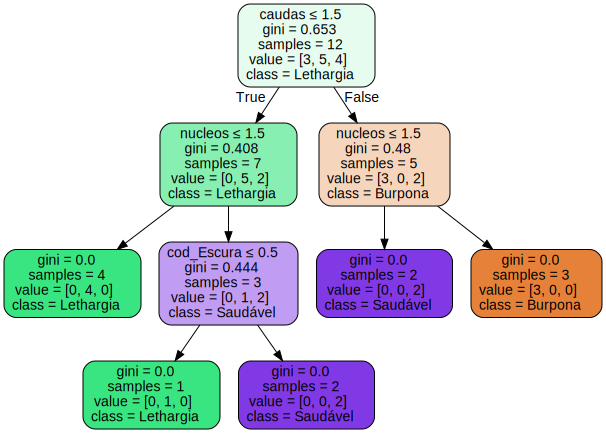

In [38]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                 feature_names=X.columns,class_names=names ,
                                 filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data)
graph